## LINEAR REGRESSION USING FIRST PRINCIPLE

### Linear Regression
Linear programming is a mathematical technique for finding optimal solutions to problems that can be expressed using linear equations and inequalities.
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

## Overview

#### Hypothesis (h)
Hypothesis is a significant relationship between an independent variable X and a dependent variable Y.

${x_0}$ is bias value should be 1


   $->\begin{align}
    \ {h} = \theta_0*x_0+ \theta_1*x_1 \;\;(For\;single\;variable)
    \end{align}
   $

#### Cost Function (mean squared difference )
$->\begin{align}
   \ {J(min)} = (1/(2*m))* \sum_{i=1}^m (h_i - y_i )^2
   \end{align}
    $

#### Gradient Descent
Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error(MSE) cost function.

$\begin{align}
   \ {\theta} = {\theta}-{ \alpha }\frac{\partial j}{\Bigl({\partial \theta}\Bigr)}  
   \end{align}
    $


## Data
Dummy data to apply linear regression on.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data set
data = pd.read_csv('Data_set/Machine_First_example.csv')
data.head()

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [3]:
#loc attribute access paticular cell in the given DataFrame using the index & column labels.
x=np.array(data.iloc[:,0:-1])
y=np.array(data.iloc[:,:-1])

In [4]:
print(np.shape(x))
print(np.shape(y))

(743, 1)
(743, 1)


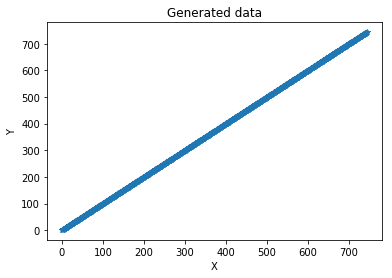

In [5]:
#ploting X and Y Dataset (x should be input dataset and y should output dataset(left side))
plt.title("Generated data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,'*')
plt.show()

### Training & Testing Dataset

The training data is used to make sure the machine recognizes patterns in the data,and the test data is used to see how well the machine can predict new answers based on its training.

In [6]:
#split function using randomization
def split_data(x,y,test_per):
    m=len(x)
    random_data=np.random.randint(0,m,m)
    #Number Of train set & test set 
    num_train_set = int((1-test_per)*m)
    num_test_set  = int(test_per*m)
    train_ind=random_data[0:num_train_set]
    #creating a array of zeros for the train dataset
    x_train=np.zeros((len(train_ind),1))
    y_train=np.zeros((len(train_ind),1))
    # x_train & y_train after the split 
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    num_test_set=random_data[num_train_set::]
    #creating a array of zeros for the test dataset
    x_test=np.zeros((len(num_test_set),1))
    y_test=np.zeros((len(num_test_set),1))
    #x_test & y_test after the split
    x_test = x[num_test_set]
    y_test = y[num_test_set]
    return x_train,y_train,x_test,y_test

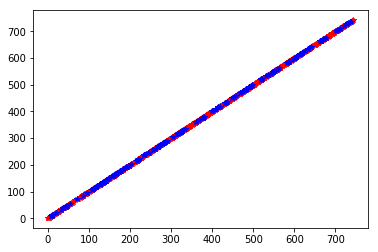

In [7]:
x_train,y_train,x_test,y_test = split_data(x,y,0.2)
#Plotting the graph x_train,y_train,x_test,y_test
plt.plot(x_train,y_train,'r*')
plt.plot(x_test,y_test,'b*')

## Adding x0 bias in Dataset

In [8]:
r,c=np.shape(x_train)
x_train=np.transpose(x_train)
x0=np.ones((r,1))
x0=np.transpose(x0)
x_train=np.transpose(np.concatenate((x0,x_train)))
print(np.shape(x0),np.shape(x_train))

(1, 594) (594, 2)


## Cost Function & Gradient Descent

In [9]:
#Initialize variables
r,c=np.shape(x_train)
theta=np.zeros((1,c))
alpha=0.00001
num_iters=1000

In [10]:
def costfunction(x_train,y_train,theta):
    m=len(x_train)
    j=0
    for i in range(m):
        h=np.matmul(theta,np.transpose(x_train[i]))
        j=j+((h-y_train[i])**2)       
    return j/(2*m)


In [11]:
j1 = costfunction(x_train,y_train,theta)
print("Cost value is", j1)

Cost value is [92942.18602694]


In [12]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    l=0
    cost = []
    while l<num_iters:
        err=np.zeros((1,c))
        h=np.matmul(theta,np.transpose(x_train))
        err=np.sum(((np.transpose(h)-y_train)*x_train),axis=0)
        theta=theta-(alpha*(1/r))*err
        J=costfunction(x_train,y_train,theta)
        cost.append(J[0])
        l=l+1
    return theta,cost
    

In [13]:
thetas,J_history=gradientDescent(x_train,y_train,theta,alpha,num_iters)
print("Theta values are",thetas)

Theta values are [[0.00202756 0.99999588]]


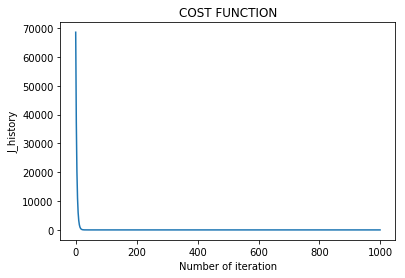

In [14]:
plt.plot(J_history)
plt.title("COST FUNCTION")
plt.xlabel('Number of iteration')
plt.ylabel('J_history')
plt.show()

## Predicting Y

In [21]:

yhat=np.matmul(theta,np.transpose(x_train))
yhat=np.transpose(yhat)
print(np.shape(theta),np.shape(yhat))
train_err=np.sum(np.abs(((y_train/(max(y_train)))-(yhat))/len(yhat)))
print("Training Error:",train_err)

(1, 2) (594, 1)
Training Error: 0.5091231270476553
